In [7]:
from sympy import *
init_printing(use_latex=True)
from IPython.display import display

## 1.
(a)

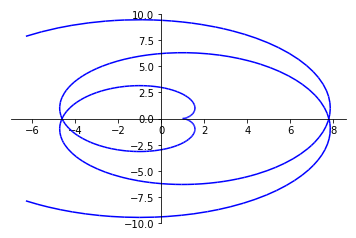

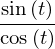

In [54]:
%matplotlib inline
x,y,t = symbols('x y t')
x = cos(t) + t*sin(t)
y = sin(t) - t*cos(t)
p = plotting.plot_parametric(x, y, autoscale=True, show=False, range=(t, -2*pi, 2*pi))
p[0].line_color = 'blue'
p.show()

# dy/dx = dy/dt / dx/dt

dydt = diff(y,t)
dxdt = diff(x,t)
dydx = dydt / dxdt
display(dydx)

(b)

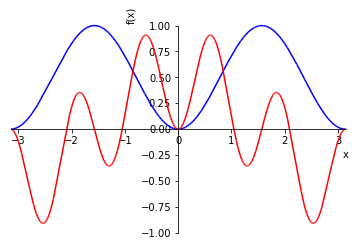

In [58]:
x = symbols('x')
f1_1 = sin(x) * sin(x)
f2_3 = sin(2*x) * sin(3*x)
p = plot(f1_1, f2_3, show=False)
p[0].line_color = "blue"
p[1].line_color = "red"
p.xlim=([float(-pi),float(pi)])
p.show()
display(integrate(f1_1, (x,-pi,pi)))
display(integrate(f2_3, (x,-pi,pi)))

#### pi (n=m)
\[-pi,0\], \[0,pi\] でそれぞれ$\frac{\pi}{2}$足している
#### 0 (n≠m)
(右側)\[0,1(らへん)\]と\[2(らへん),pi\], \[1(らへん), 1.5(らへん)\]と\[1.5(らへん),2(らへん)\] が、それぞれ打ち消し合っている。左側も同様

### 同時対角化

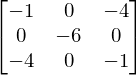

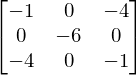

In [81]:
import numpy as np
A = Matrix([[1,0,-2],[0,2,0],[-2,0,1]])
B = Matrix([[3,0,2],[0,-3,0],[2,0,3]])
display(A*B)
display(B*A)

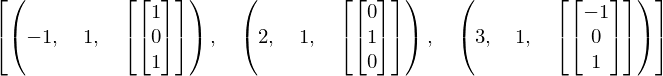

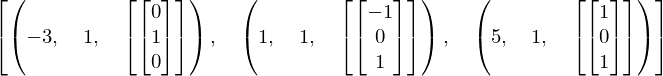

In [110]:
display(A.eigenvects())
display(B.eigenvects())

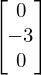

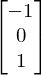

In [148]:
x1 = Matrix([1,0,1])
x2 = Matrix([0,1,0])
x3 = Matrix([-1,0,1])
Bx1 = B*x1
Bx2 = B*x2
Bx3 = B*x3
display(Bx1) # 5 * x1
display(Bx2) # -3 * x2
display(Bx3) # 1 * x3

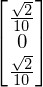

In [124]:
p1 = x1/sqrt(50)
p2 = x2/sqrt(9)
p3 = x3/sqrt(2)
display(p1)


In [153]:
P = np.column_stack((p1,p2,p3))
print(P)

[[sqrt(2)/10 0 -sqrt(2)/2]
 [0 1/3 0]
 [sqrt(2)/10 0 sqrt(2)/2]]


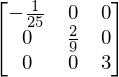

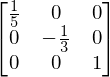

In [156]:
display(P.T*A*P)
display(P.T*B*P)